In [1]:
import pandas as pd
print(pd.__version__)


2.2.3


In [2]:
import sys
print(sys.executable)


C:\Users\user\AppData\Local\Programs\Python\Python313\python.exe


In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('lightening_strikes_dataset.csv') 
df.head()

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)


In [4]:
df.shape

(3401012, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 3 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   date               object
 1   number_of_strikes  int64 
 2   center_point_geom  object
dtypes: int64(1), object(2)
memory usage: 77.8+ MB


In [8]:
# Convert date column to datetime
df['date']= pd.to_datetime(df['date'])
df.info()  #previously was object type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 3 columns):
 #   Column             Dtype         
---  ------             -----         
 0   date               datetime64[ns]
 1   number_of_strikes  int64         
 2   center_point_geom  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 77.8+ MB


In [9]:
# Calculate days with most lightning strikes.
df.groupby(['date']).sum().sort_values('number_of_strikes', ascending=False).head(10)

,number_of_strikes,center_point_geom
date,,
2018-08-29,1070457,POINT(-85.7 29.1)POINT(-85.6 29.1)POINT(-84.5 ...
2018-08-17,969774,POINT(-80.6 20.3)POINT(-80.5 20.3)POINT(-80.4 ...
2018-08-28,917199,POINT(-108.2 28)POINT(-108.1 28)POINT(-108 28)...
2018-08-27,824589,POINT(-109 24.8)POINT(-108 24.8)POINT(-88.1 24...
2018-08-30,802170,POINT(-75.7 19)POINT(-75.6 19)POINT(-78 20)POI...
2018-08-19,786225,POINT(-73 35)POINT(-103 35)POINT(-101 35)POINT...
2018-08-18,741180,POINT(-110.7 46)POINT(-104.9 46)POINT(-115.1 4...
2018-08-16,734475,POINT(-97 20)POINT(-77 20)POINT(-96.9 20)POINT...
2018-08-31,723624,POINT(-95.2 48.4)POINT(-96 48.1)POINT(-96.1 48...


In [13]:
# Create a new `month` column
df['month'] = df['date'].dt.month
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401012 entries, 0 to 3401011
Data columns (total 4 columns):
 #   Column             Dtype         
---  ------             -----         
 0   date               datetime64[ns]
 1   number_of_strikes  int64         
 2   center_point_geom  object        
 3   month              int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(1)
memory usage: 90.8+ MB


**Strikes per month evaluation**

In [16]:
# Calculate total number of strikes per month (some type of columns are not same to filter only month and strikes)
df_month = df[['number_of_strikes', 'month']]
df_month.head()
df_month.groupby(['month']).sum().sort_values('number_of_strikes', ascending=False).head(12)

,number_of_strikes
month,
8,15525255
7,8320400
6,6445083
5,4166726
9,3018336
2,2071315
4,1524339
10,1093962
1,860045


In [21]:
df['month_txt'] = df['date'].dt.month_name().str.slice(stop=3)
df.head(10)

,date,number_of_strikes,center_point_geom,month,month_txt
0,2018-01-03,194,POINT(-75 27),1,Jan
1,2018-01-03,41,POINT(-78.4 29),1,Jan
2,2018-01-03,33,POINT(-73.9 27),1,Jan
3,2018-01-03,38,POINT(-73.8 27),1,Jan
4,2018-01-03,92,POINT(-79 28),1,Jan
5,2018-01-03,119,POINT(-78 28),1,Jan
6,2018-01-03,35,POINT(-79.3 28),1,Jan
7,2018-01-03,60,POINT(-79.1 28),1,Jan
8,2018-01-03,41,POINT(-78.7 28),1,Jan
9,2018-01-03,119,POINT(-78.6 28),1,Jan


In [22]:
df_monthname = df[['number_of_strikes', 'month', 'month_txt']]
df_monthname.head()
df_by_month = df_monthname.groupby(['month','month_txt']).sum().sort_values('month', ascending=True).head(12).reset_index()
df_by_month

,month,month_txt,number_of_strikes
0,1,Jan,860045
1,2,Feb,2071315
2,3,Mar,854168
3,4,Apr,1524339
4,5,May,4166726
5,6,Jun,6445083
6,7,Jul,8320400
7,8,Aug,15525255
8,9,Sep,3018336
9,10,Oct,1093962


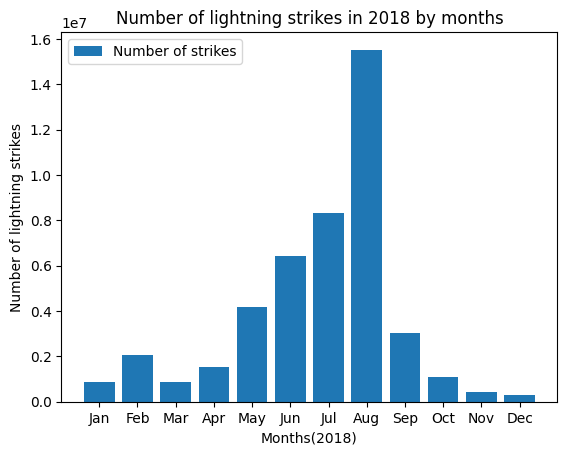

In [23]:
plt.bar(x=df_by_month['month_txt'],height= df_by_month['number_of_strikes'], label="Number of strikes")
plt.plot()

plt.xlabel("Months(2018)")
plt.ylabel("Number of lightning strikes")
plt.title("Number of lightning strikes in 2018 by months")
plt.legend()
plt.show()

**Strikes per location evaluation**

In [24]:
# Sort by number of strikes in descending order.
df.sort_values(by='number_of_strikes', ascending=False).head(10)

,date,number_of_strikes,center_point_geom,month,month_txt
302758,2018-08-20,2211,POINT(-92.5 35.5),8,Aug
278383,2018-08-16,2142,POINT(-96.1 36.1),8,Aug
280830,2018-08-17,2061,POINT(-90.2 36.1),8,Aug
280453,2018-08-17,2031,POINT(-89.9 35.9),8,Aug
278382,2018-08-16,1902,POINT(-96.2 36.1),8,Aug
11517,2018-02-10,1899,POINT(-95.5 28.1),2,Feb
277506,2018-08-16,1878,POINT(-89.7 31.5),8,Aug
24906,2018-02-25,1833,POINT(-98.7 28.9),2,Feb
284320,2018-08-17,1767,POINT(-90.1 36),8,Aug
24825,2018-02-25,1741,POINT(-98 29),2,Feb


In [25]:
# Identify the locations that appear most in the dataset.  Locations with most days with at least one lightning strike
df.center_point_geom.value_counts()

center_point_geom
POINT(-81.5 22.5)     108
POINT(-84.1 22.4)     108
POINT(-82.7 22.9)     107
POINT(-82.5 22.9)     107
POINT(-84.2 22.3)     106
                     ... 
POINT(-130.2 47.4)      1
POINT(-67.5 41.7)       1
POINT(-60.2 44.1)       1
POINT(-117.8 34.6)      1
POINT(-60.4 44.5)       1
Name: count, Length: 170855, dtype: int64

In [26]:
# Identify the top 20 locations with most days of lightning.
df.center_point_geom.value_counts()[:20].rename_axis('unique_values').reset_index(name='counts').style.background_gradient()

,unique_values,counts
0,POINT(-81.5 22.5),108
1,POINT(-84.1 22.4),108
2,POINT(-82.7 22.9),107
3,POINT(-82.5 22.9),107
4,POINT(-84.2 22.3),106
5,POINT(-82.5 22.8),106
6,POINT(-76 20.5),105
7,POINT(-75.9 20.4),105
8,POINT(-82.2 22.9),104
9,POINT(-78 18.2),104


**now by per week and weekdays**

In [27]:
# Create two new columns.
df['week'] = df.date.dt.isocalendar().week
df['weekday'] = df.date.dt.day_name()
df.head()

,date,number_of_strikes,center_point_geom,month,month_txt,week,weekday
0,2018-01-03,194,POINT(-75 27),1,Jan,1,Wednesday
1,2018-01-03,41,POINT(-78.4 29),1,Jan,1,Wednesday
2,2018-01-03,33,POINT(-73.9 27),1,Jan,1,Wednesday
3,2018-01-03,38,POINT(-73.8 27),1,Jan,1,Wednesday
4,2018-01-03,92,POINT(-79 28),1,Jan,1,Wednesday


In [28]:
df = df.drop(columns=['month', 'month_txt'])
df.head()

,date,number_of_strikes,center_point_geom,week,weekday
0,2018-01-03,194,POINT(-75 27),1,Wednesday
1,2018-01-03,41,POINT(-78.4 29),1,Wednesday
2,2018-01-03,33,POINT(-73.9 27),1,Wednesday
3,2018-01-03,38,POINT(-73.8 27),1,Wednesday
4,2018-01-03,92,POINT(-79 28),1,Wednesday


In [29]:
df[['weekday','number_of_strikes']].groupby(['weekday']).mean()

,number_of_strikes
weekday,
Friday,13.349972
Monday,13.152804
Saturday,12.732694
Sunday,12.324717
Thursday,13.240594
Tuesday,13.813599
Wednesday,13.224568


In [32]:
!pip install seaborn


In [33]:
import seaborn as sns

C:\Users\user\AppData\Local\Temp\ipykernel_2208\3827682541.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.boxplot(data=df,


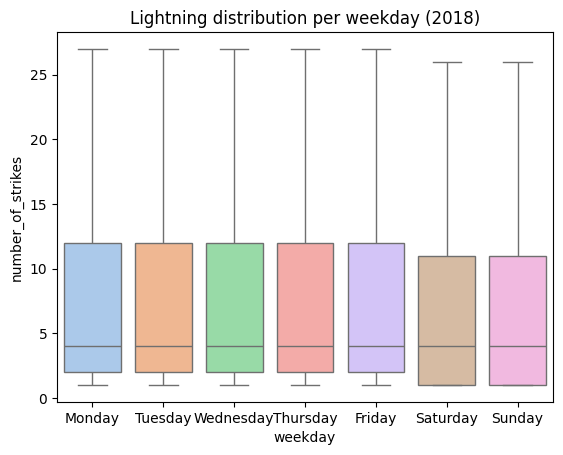

In [35]:
# Define order of days for the plot.
weekday_order = ['Monday','Tuesday', 'Wednesday', 'Thursday','Friday','Saturday','Sunday']
# Create boxplots of strike counts for each day of week.
g = sns.boxplot(data=df, 
            x='weekday',
            y='number_of_strikes', 
            palette="pastel",
            order=weekday_order, 
            showfliers=False 
            );
g.set_title('Lightning distribution per weekday (2018)');

**lightning by Year**

In [39]:
#another table of data from year 2016-2017
df_2 = pd.read_csv('lightening_strikes_dataset2.csv')
df_2.head()
# Convert `date` column to datetime.
df_2['date'] = pd.to_datetime(df_2['date'])

In [43]:
union_df = pd.concat([df.drop(['weekday','week'],axis=1), df_2], ignore_index=True)
union_df.head()

,date,number_of_strikes,center_point_geom
0,2018-01-03,194,POINT(-75 27)
1,2018-01-03,41,POINT(-78.4 29)
2,2018-01-03,33,POINT(-73.9 27)
3,2018-01-03,38,POINT(-73.8 27)
4,2018-01-03,92,POINT(-79 28)


In [45]:
union_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13880015 entries, 0 to 13880014
Data columns (total 6 columns):
 #   Column             Dtype         
---  ------             -----         
 0   date               datetime64[ns]
 1   number_of_strikes  int64         
 2   center_point_geom  object        
 3   year               int32         
 4   month              int32         
 5   month_txt          object        
dtypes: datetime64[ns](1), int32(2), int64(1), object(2)
memory usage: 529.5+ MB


In [44]:
union_df['year'] = union_df.date.dt.year
union_df['month'] = union_df.date.dt.month
union_df['month_txt'] = union_df.date.dt.month_name()
union_df.head()

,date,number_of_strikes,center_point_geom,year,month,month_txt
0,2018-01-03,194,POINT(-75 27),2018,1,January
1,2018-01-03,41,POINT(-78.4 29),2018,1,January
2,2018-01-03,33,POINT(-73.9 27),2018,1,January
3,2018-01-03,38,POINT(-73.8 27),2018,1,January
4,2018-01-03,92,POINT(-79 28),2018,1,January


In [46]:
# Calculate total number of strikes per year
union_df[['year','number_of_strikes']].groupby(['year']).sum()

,number_of_strikes
year,
2016,41582229
2017,35095195
2018,89201978


In [48]:
# Calculate total lightning strikes for each month of each year.
lightning_by_month = union_df.groupby(['month_txt','year']).agg(
    number_of_strikes = pd.NamedAgg(column='number_of_strikes',aggfunc=sum)
    ).reset_index()

lightning_by_month.head(10)

C:\Users\user\AppData\Local\Temp\ipykernel_2208\3735658670.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  lightning_by_month = union_df.groupby(['month_txt','year']).agg(


,month_txt,year,number_of_strikes
0,April,2016,2636427
1,April,2017,3819075
2,April,2018,3048678
3,August,2016,7250442
4,August,2017,6021702
5,August,2018,31050510
6,December,2016,316450
7,December,2017,294958
8,December,2018,624194
9,February,2016,312676


In [49]:
# Calculate total lightning strikes for each year.
lightning_by_year = union_df.groupby(['year']).agg(
  year_strikes = pd.NamedAgg(column='number_of_strikes',aggfunc=sum)
).reset_index()

lightning_by_year.head()

C:\Users\user\AppData\Local\Temp\ipykernel_2208\1371192814.py:2: FutureWarning: The provided callable <built-in function sum> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  lightning_by_year = union_df.groupby(['year']).agg(


,year,year_strikes
0,2016,41582229
1,2017,35095195
2,2018,89201978


In [50]:
# Combine `lightning_by_month` and `lightning_by_year` dataframes into single dataframe.
percentage_lightning = lightning_by_month.merge(lightning_by_year,on='year')
percentage_lightning.head()

,month_txt,year,number_of_strikes,year_strikes
0,April,2016,2636427,41582229
1,April,2017,3819075,35095195
2,April,2018,3048678,89201978
3,August,2016,7250442,41582229
4,August,2017,6021702,35095195


In [51]:
# Create new `percentage_lightning_per_month` column.
percentage_lightning['percentage_lightning_per_month'] = (percentage_lightning.number_of_strikes/
                                                          percentage_lightning.year_strikes * 100.0)
percentage_lightning.head()

,month_txt,year,number_of_strikes,year_strikes,percentage_lightning_per_month
0,April,2016,2636427,41582229,6.340273
1,April,2017,3819075,35095195,10.882045
2,April,2018,3048678,89201978,3.417725
3,August,2016,7250442,41582229,17.436396
4,August,2017,6021702,35095195,17.158195


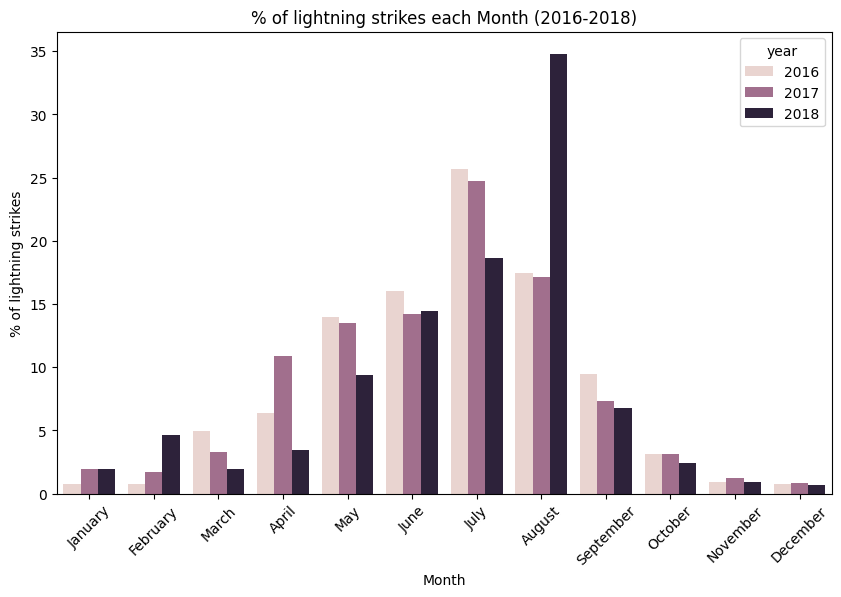

In [53]:
plt.figure(figsize=(10,6));

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']

sns.barplot(
    data = percentage_lightning,
    x = 'month_txt',
    y = 'percentage_lightning_per_month',
    hue = 'year',
    order = month_order );
plt.xlabel("Month");
plt.ylabel("% of lightning strikes");
plt.xticks(rotation=45)  # Rotate labels by 45 degrees
plt.title("% of lightning strikes each Month (2016-2018)");